## Heart Disease Presence Prediction

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Import the necessery libraries. pandas and numpy will be used for data import and basic operations. seaborn will be used for data visualization, with matplotlib as underlying library. Sklearn is used for modelling and training purpose. <br><br>
The dataset is taken from kaggle.

In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


The dataset contains 12 columns, and 918 rows in total. Column names are as listed above. The dataset contains no NULL values.

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Data Visualization

The statistics of numerical columns in the dataset is printed.

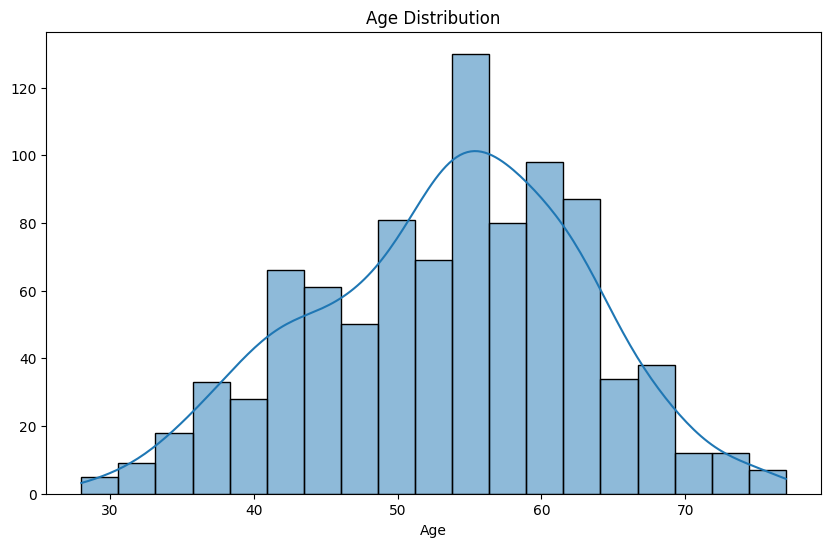

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(df["Age"], kde = True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel("")
plt.show()

The distribution of age of patients included in the servey. The distribution is almost a normal distribution with mean around 55.

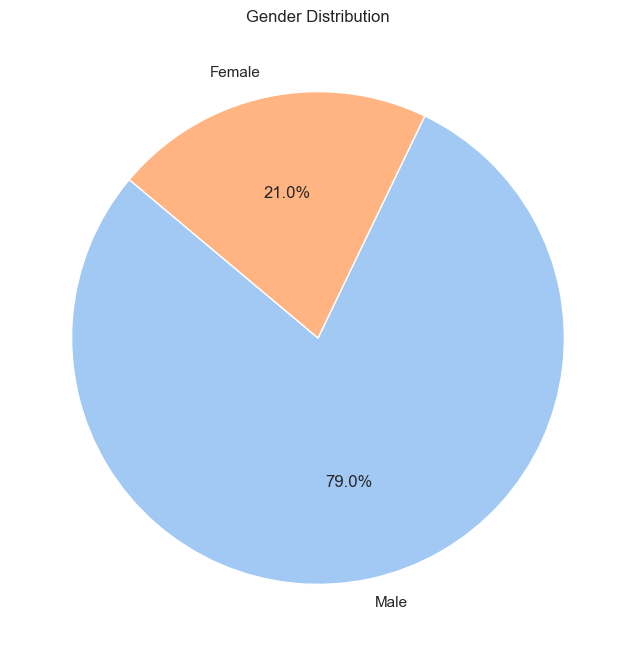

In [ ]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
sns.color_palette("pastel")
sns.set_palette("pastel")


plt.pie(df["Sex"].value_counts(), labels=["Male", "Female"], autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

Gender Distribution. The dataset is biased towards Male patients with only 20% of them being Females.

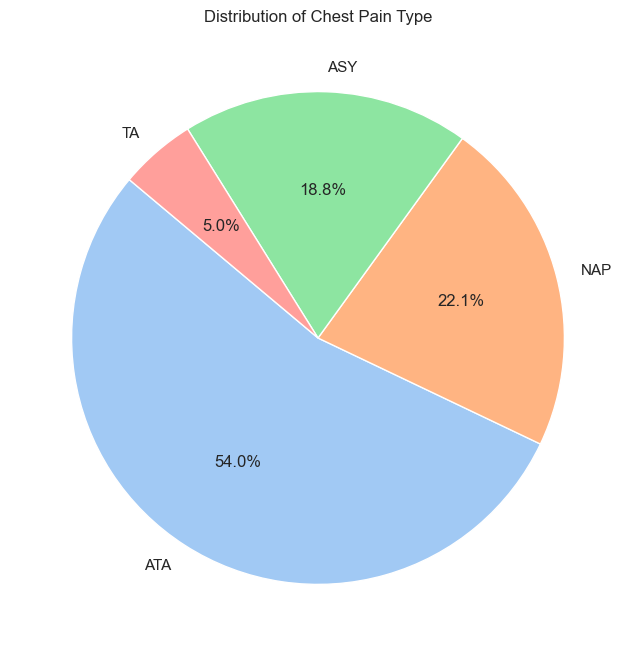

In [ ]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
sns.color_palette("pastel")
sns.set_palette("pastel")

plt.pie(df["ChestPainType"].value_counts(), labels=['ATA', 'NAP', 'ASY', 'TA'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Chest Pain Type')
plt.show()

Type of chest pain. This may take any of these values: <br>

> ATA (Atypical Angina): This type of chest pain is not typical and may not follow the usual patterns of chest discomfort. The pain might be sharp, burning, or discomfort that is different from classic angina symptoms.<br><br>
NAP (Non-Anginal Pain): This category is used when the chest pain is not related to angina. It could be caused by other factors, such as musculoskeletal issues or inflammation.<br><br>
ASY (Asymptomatic): This means the person is not experiencing any symptoms. It's possible that they are not feeling any chest pain or discomfort at all.<br><br>
TA (Typical Angina): This represents the classic type of chest pain associated with angina. It's often described as a feeling of pressure, squeezing, or fullness in the chest. The pain may also radiate to other areas, such as the arms.



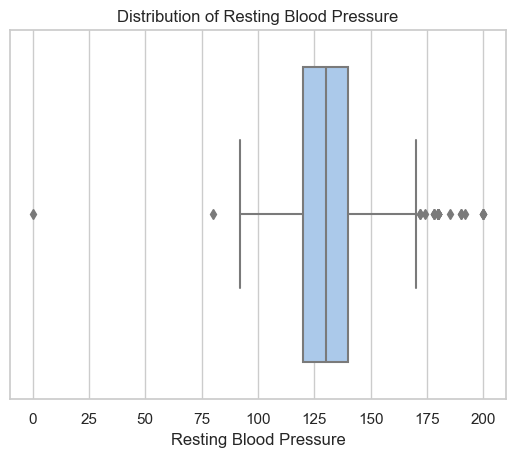

In [ ]:
sns.boxplot(x='RestingBP', data=df)

plt.title('Distribution of Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('')
plt.show()

Boxplot showing the distribution of Resting Blood Pressure (The blood pressure when the person is not exercising or under stress). We can see that the average Resting BP is around 125-130.

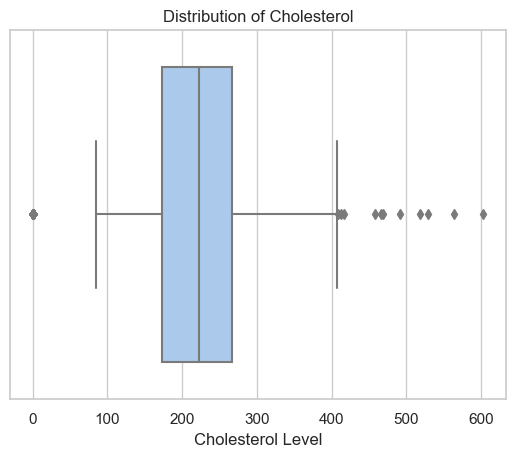

In [ ]:
sns.boxplot(x='Cholesterol', data=df)

plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol Level')
plt.ylabel('')
plt.show()

Cholesterol level. It ranges from 90 to 400, with the average of 220.

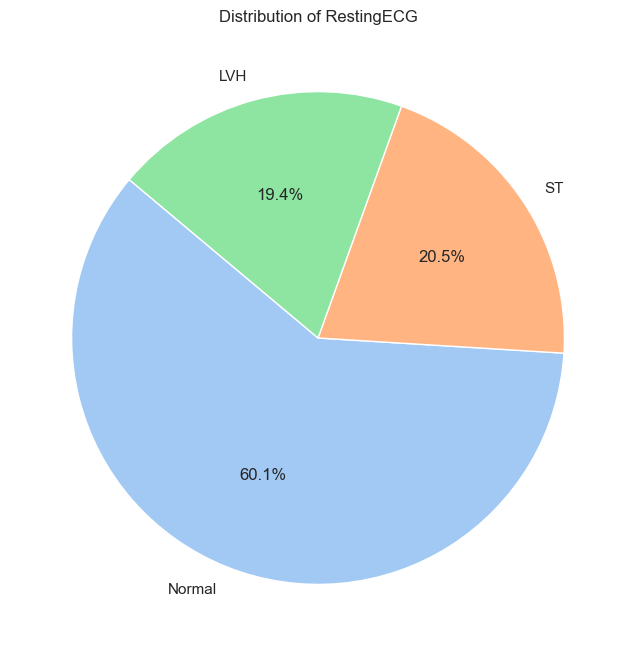

In [ ]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
sns.color_palette("pastel")
sns.set_palette("pastel")

plt.pie(df["RestingECG"].value_counts(), labels=['Normal', 'ST', 'LVH'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of RestingECG')
plt.show()

Resting Electrocardiogram (A test measuring the heart's electrical activity at rest). This can take one of these values: <br>
>Normal: Within the expected range. The electrical activity of the heart, as recorded by the ECG, shows no signs of abnormalities at rest. <br><br>
ST (ST-T Abnormality): This suggests an abnormality in the ST segment of the ECG. Changes in the ST segment can be indicative of various heart conditions, and further evaluation may be needed to understand the significance.<br><br>
LVH (Left Ventricular Hypertrophy): This indicates that the left ventricle of the heart, which is responsible for pumping blood to the body, has thickened. LVH can be a result of conditions like high blood pressure or heart valve disease.

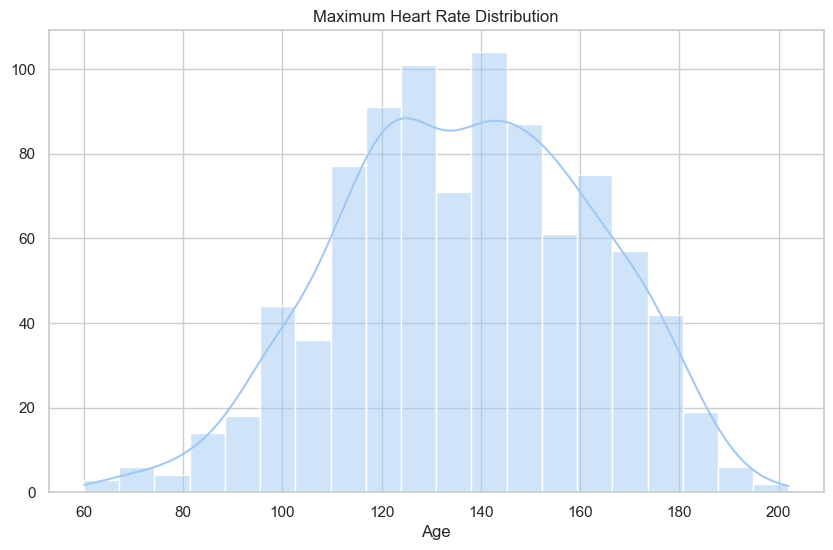

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(df["MaxHR"], kde = True)
plt.title('Maximum Heart Rate Distribution')
plt.xlabel('Age')
plt.ylabel("")
plt.show()

Shows the distribution of Maximum heart rate acheived during physical activities or stress.

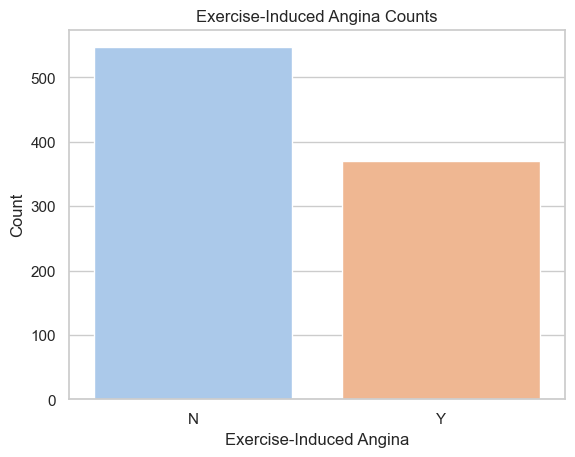

In [ ]:
sns.countplot(x='ExerciseAngina', data=df)

plt.title('Exercise-Induced Angina Counts')
plt.xlabel('Exercise-Induced Angina')
plt.ylabel('Count')
plt.show()

Count of Whether the person experiences chest pain during physical activity (Exercise-Induced Angina).


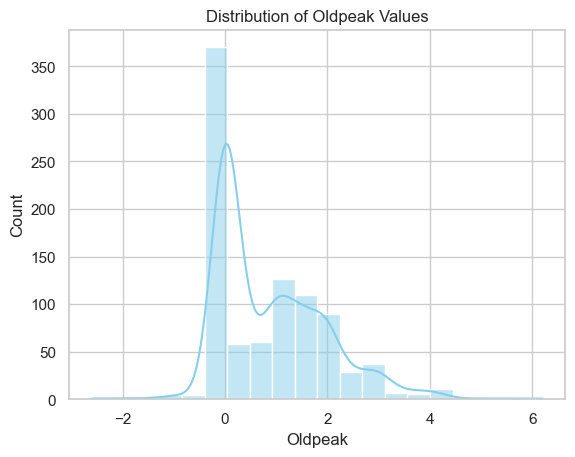

In [ ]:
sns.histplot(data=df, x='Oldpeak', bins=20, kde=True, color='skyblue')

plt.title('Distribution of Oldpeak Values')
plt.xlabel('Oldpeak')
plt.ylabel('Count')
plt.show()

Oldpeak distribution (ST depression induced by exercise relative to rest).

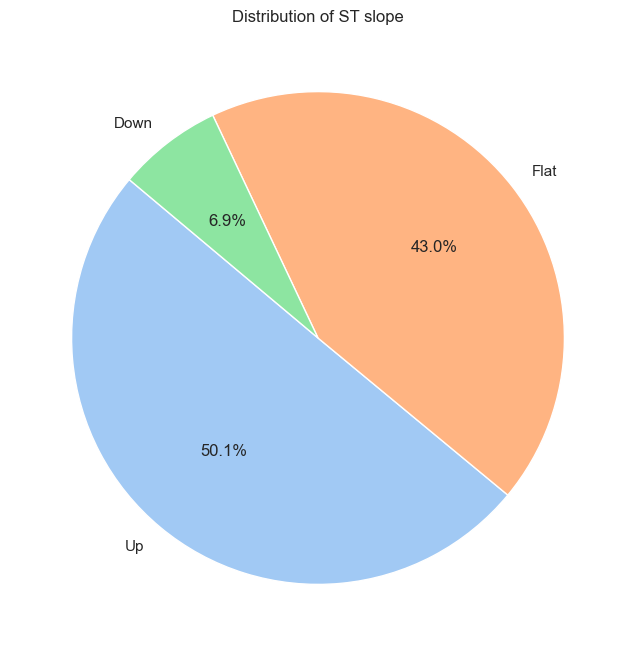

In [ ]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
sns.color_palette("pastel")
sns.set_palette("pastel")

plt.pie(df["ST_Slope"].value_counts(), labels=['Up', 'Flat', 'Down'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of ST slope')
plt.show()

Result of ST segment during electrocardiogram test. <br>
* "Up" ST slope indicates a rising pattern in the ST segment during exercise on an electrocardiogram.
* "Flat" ST slope signifies a relatively horizontal ST segment during exercise.
* "Down" ST slope denotes a downward trend in the ST segment on the electrocardiogram during physical activity.

### Data Preprocessing

In [ ]:
num_data = pd.get_dummies(df, columns = ['Sex', 'ChestPainType', "RestingECG", "ExerciseAngina", "ST_Slope"], dtype=float)

In [ ]:
num_data = num_data.drop(['Sex_F', 'ExerciseAngina_N'], axis=1)

dicti = {
    "Sex_M": "Sex",
    "ExerciseAngina_Y": "ExerciseAngina"
}

num_data.rename(columns = dicti, inplace=True)
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex                918 non-null    float64
 8   ChestPainType_ASY  918 non-null    float64
 9   ChestPainType_ATA  918 non-null    float64
 10  ChestPainType_NAP  918 non-null    float64
 11  ChestPainType_TA   918 non-null    float64
 12  RestingECG_LVH     918 non-null    float64
 13  RestingECG_Normal  918 non-null    float64
 14  RestingECG_ST      918 non-null    float64
 15  ExerciseAngina     918 non-null    float64
 16  ST_Slope_Down      918 non

Converting categorical columns into numerical attributes for analysis. Remove unnecesery columns from the dataset and use suitable names for columns.

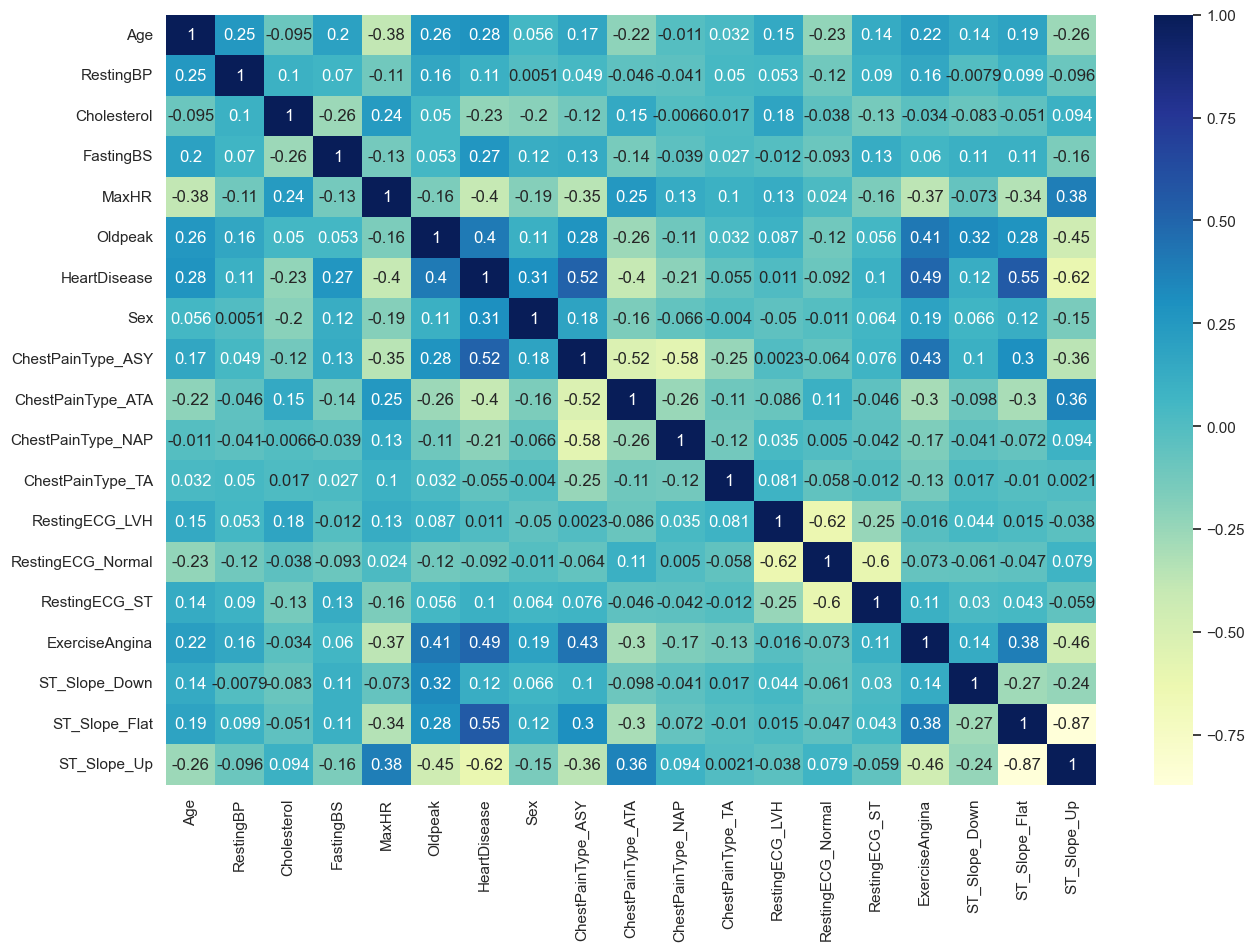

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(num_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

Correlation Heatmap. These are used for calculating the correlation between each pair of columns in the dataset.

In [ ]:
corr = num_data.select_dtypes(include=np.number).corr()
corr["HeartDisease"]

Age                  0.282039
RestingBP            0.107589
Cholesterol         -0.232741
FastingBS            0.267291
MaxHR               -0.400421
Oldpeak              0.403951
HeartDisease         1.000000
Sex                  0.305445
ChestPainType_ASY    0.516716
ChestPainType_ATA   -0.401924
ChestPainType_NAP   -0.212964
ChestPainType_TA    -0.054790
RestingECG_LVH       0.010670
RestingECG_Normal   -0.091580
RestingECG_ST        0.102527
ExerciseAngina       0.494282
ST_Slope_Down        0.122527
ST_Slope_Flat        0.554134
ST_Slope_Up         -0.622164
Name: HeartDisease, dtype: float64

Retrieving Correlation between target value (HeartDisease) and each column. Only columns with high correlation (abs value > 0.4) are selected.

In [ ]:
cols = ['MaxHR', 'Oldpeak', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ExerciseAngina', 'ST_Slope_Flat', 'ST_Slope_Up']

features = num_data[cols]
label = num_data["HeartDisease"]

Features are Independent variables used to predict the target values. Splitting the data into features and labels.

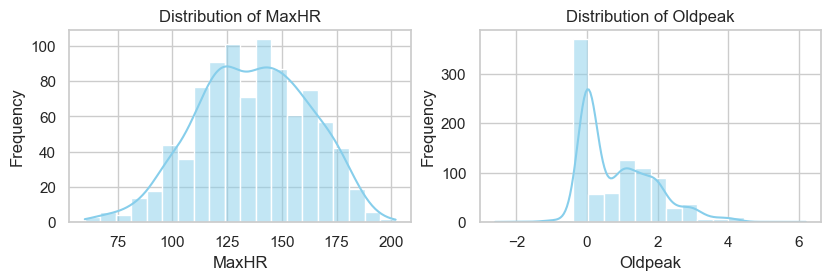

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_features = ['MaxHR', 'Oldpeak']

plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=feature, kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.show()


Some of the columns in features are on different scale scale, i.e., not all the columns are in a uniform range. Use feature scaling techniques to make all the columns fall within a particular range.

In [ ]:
from sklearn.preprocessing import StandardScaler

standerd_scaler = StandardScaler()
features["MaxHR"] = standerd_scaler.fit_transform(features[["MaxHR"]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
features["Oldpeak"] = min_max_scaler.fit_transform(features[["Oldpeak"]])

Use minmax normalization and z-score normalization to scale MaxHR and Oldpeak.

In [ ]:
features.describe()

,MaxHR,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ExerciseAngina,ST_Slope_Flat,ST_Slope_Up
count,9.180000e+02,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,4.953675e-16,-0.207417,0.540305,0.188453,0.404139,0.501089,0.430283
std,1.000545e+00,0.242402,0.498645,0.391287,0.490992,0.500271,0.495386
min,-3.018469e+00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.605778e-01,-0.409091,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.678968e-02,-0.272727,1.000000,0.000000,0.000000,1.000000,0.000000
75%,7.541571e-01,-0.068182,1.000000,0.000000,1.000000,1.000000,1.000000
max,2.561874e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now all of features fall within a definite range.

### Training and Selection of model

In [ ]:
from sklearn.svm import SVC

SVMclf = SVC(kernel="linear", C=0.025, random_state=42).fit(features, label)
confusion_matrix(label, SVMclf.predict(features))

array([[321,  89],
       [ 75, 433]], dtype=int64)

In [ ]:
precision_score(label, SVMclf.predict(features))

0.8295019157088123

In [ ]:
recall_score(label, SVMclf.predict(features))

0.8523622047244095

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTclf = DecisionTreeClassifier(random_state=0).fit(features, label)
confusion_matrix(label, DTclf.predict(features))

array([[403,   7],
       [ 10, 498]], dtype=int64)

In [ ]:
precision_score(label, DTclf.predict(features))

0.9861386138613861

In [ ]:
recall_score(label, DTclf.predict(features))

0.9803149606299213

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFclf = RandomForestClassifier(random_state=42).fit(features, label)
confusion_matrix(label, RFclf.predict(features))

array([[399,  11],
       [  6, 502]], dtype=int64)

In [ ]:
precision_score(label, RFclf.predict(features))

0.9785575048732943

In [ ]:
recall_score(label, RFclf.predict(features))

0.9881889763779528

We have checked the performance of three models with the given dataset. Accuracy and precision scores are retrieved. By the nature of this task we can say that our requirement is satisfied by the model with high recall (Recall gives you the measure of how well a model is able to capture positive instances). Hence we choose Random Forest Classifier model - RFclf.

### Model Pipeline


Here is the pipeline to do the same task with 100% accuracy (Since we are using all the columns for prediction here, and number of instances are low, the model achieves this accuracy).

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
import pandas as pd


df = pd.read_csv("heart.csv")

def Get_dummy(data):
    return pd.get_dummies(data, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype=float)

get_dummy_transformer = FunctionTransformer(Get_dummy)

preprocessing = ColumnTransformer(transformers=[
    ('get_dummy', get_dummy_transformer, ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']),
    ('standard_scaler', StandardScaler(), ['MaxHR']),
    ('minmax_scaler', MinMaxScaler(), ['Oldpeak'])
], remainder='passthrough')

processed_data = preprocessing.fit_transform(df)
label = df["HeartDisease"]

rf_pipeline = make_pipeline(RandomForestClassifier(random_state=42))
rf_pipeline.fit(processed_data, label)


Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [ ]:
confusion_matrix(label, rf_pipeline.predict(processed_data))

array([[410,   0],
       [  0, 508]], dtype=int64)

In [ ]:
from sklearn import set_config

set_config(display='diagram')
rf_pipeline

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])